<a href="https://colab.research.google.com/github/AbhijeetBeedikar/Autonomous-Taxi-Agent/blob/main/Autonomous_Taxi_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
# initializing the taxi environment
env = gym.make("Taxi-v3", render_mode="rgb_array") # render_mode helps to show the environment as a colored picture rather than a numpy array

Help on TaxiEnv in module gymnasium.envs.toy_text.taxi object:

class TaxiEnv(gymnasium.core.Env)
 |  TaxiEnv(render_mode: str | None = None, is_rainy: bool = False, fickle_passenger: bool = False)
 |  
 |  The Taxi Problem involves navigating to passengers in a grid world, picking them up and dropping them
 |  off at one of four locations.
 |  
 |  ## Description
 |  There are four designated pick-up and drop-off locations (Red, Green, Yellow and Blue) in the
 |  5x5 grid world. The taxi starts off at a random square and the passenger at one of the
 |  designated locations.
 |  
 |  The goal is move the taxi to the passenger's location, pick up the passenger,
 |  move to the passenger's desired destination, and
 |  drop off the passenger. Once the passenger is dropped off, the episode ends.
 |  
 |  The player receives positive rewards for successfully dropping-off the passenger at the correct
 |  location. Negative rewards for incorrect attempts to pick-up/drop-off passenger and
 |  

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]], dtype=uint8)
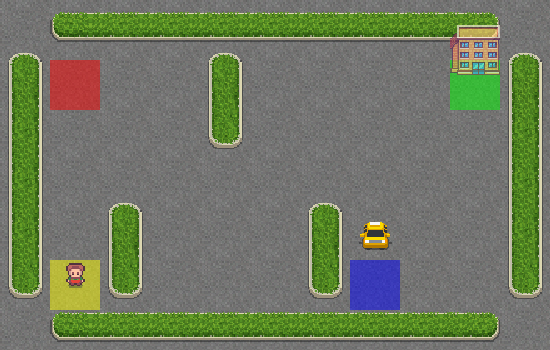

In [ ]:
# Get an idea of the OpenAI Gym environment we are dealing with and how it looks
print(help(env.unwrapped))
env.reset()
env.render()

In [ ]:
target = defaultdict(lambda:0) # default move is to go downwards

e = 0.6 # we make the behavior policy more exploratory
a = 0.1 # keep the step-size parameter low to allow smooth convergence
gamma = 0.9

# for double learning
Q1 = defaultdict(lambda:0.0)
Q2 = defaultdict(lambda:0.0)

for i in range(5000): # 5000 episodes
  print(f"Episode {i+1}")
  state,_ = env.reset()
  terminated = False
  while terminated != True: # keep updating until episode terminates

    # e-greedy choice of action by the behavior policy (which in this case is an e-soft version of the deterministic target policy)
    action = np.random.choice([target[state],np.random.choice([i for i in range(6) if i != target[state]])],p=[1-e,e])
    new_state, reward, terminated, _, _ = env.step(action)

    # Double Q-learning
    arg = []
    if np.random.choice([True,False]):
      for i in range(6):
        arg.append(Q1[(new_state,i)])
      Q1[(state,action)] = Q1[(state,action)] + a*(reward + gamma*Q2[(new_state,np.argmax(arg))] - Q1[(state,action)])
    else:
      for i in range(6):
        arg.append(Q2[(new_state,i)])
      Q2[(state,action)] = Q2[(state,action)] + a*(reward + gamma*Q1[(new_state,np.argmax(arg))] - Q2[(state,action)])

    # control method to update the target policy
    greedy = []
    for i in range(6):
      greedy.append(max(Q1[(state,i)],Q2[(state,i)]))
    target[state] = np.argmax(greedy)
    state = new_state

Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9
Episode 10
Episode 11
Episode 12
Episode 13
Episode 14
Episode 15
Episode 16
Episode 17
Episode 18
Episode 19
Episode 20
Episode 21
Episode 22
Episode 23
Episode 24
Episode 25
Episode 26
Episode 27
Episode 28
Episode 29
Episode 30
Episode 31
Episode 32
Episode 33
Episode 34
Episode 35
Episode 36
Episode 37
Episode 38
Episode 39
Episode 40
Episode 41
Episode 42
Episode 43
Episode 44
Episode 45
Episode 46
Episode 47
Episode 48
Episode 49
Episode 50
Episode 51
Episode 52
Episode 53
Episode 54
Episode 55
Episode 56
Episode 57
Episode 58
Episode 59
Episode 60
Episode 61
Episode 62
Episode 63
Episode 64
Episode 65
Episode 66
Episode 67
Episode 68
Episode 69
Episode 70
Episode 71
Episode 72
Episode 73
Episode 74
Episode 75
Episode 76
Episode 77
Episode 78
Episode 79
Episode 80
Episode 81
Episode 82
Episode 83
Episode 84
Episode 85
Episode 86
Episode 87
Episode 88
Episode 89
Episode 90
Episode 91
Episode 

Passenger location: Blue, Passenger Destination: Red


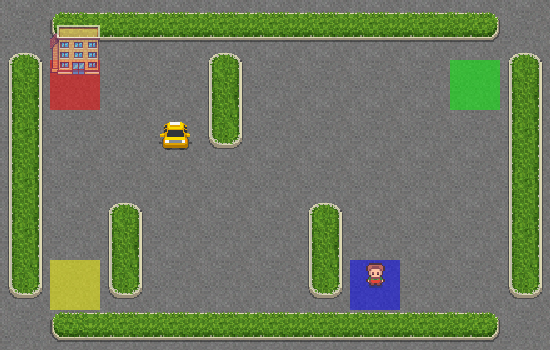

None


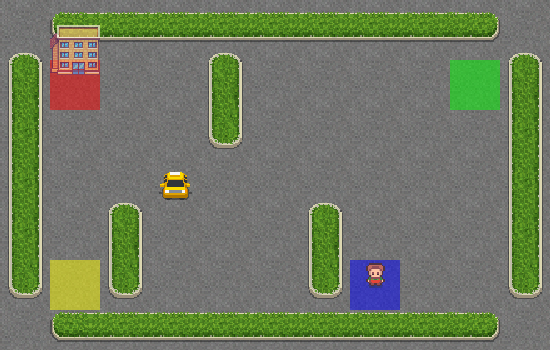

None


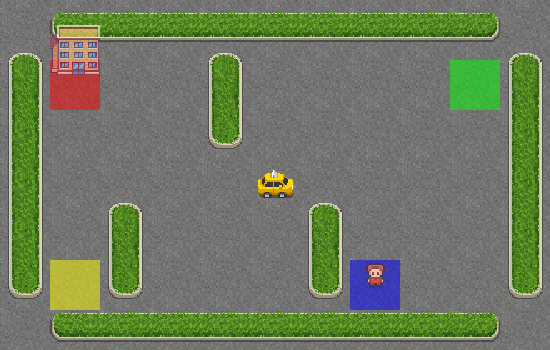

None


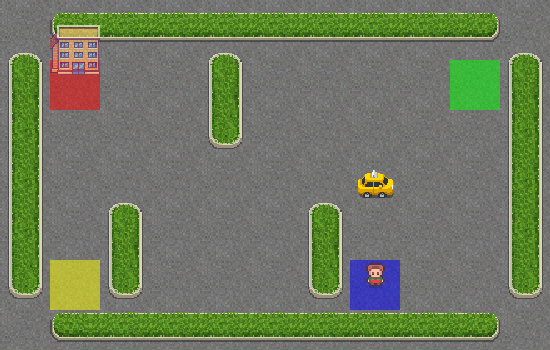

None


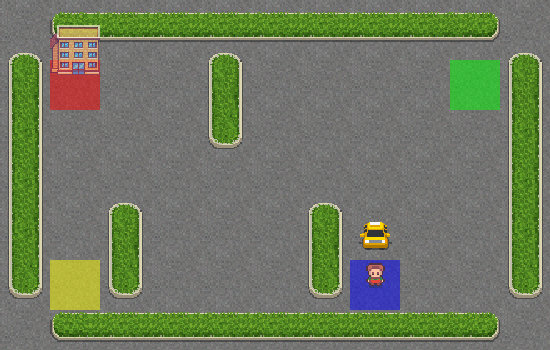

None


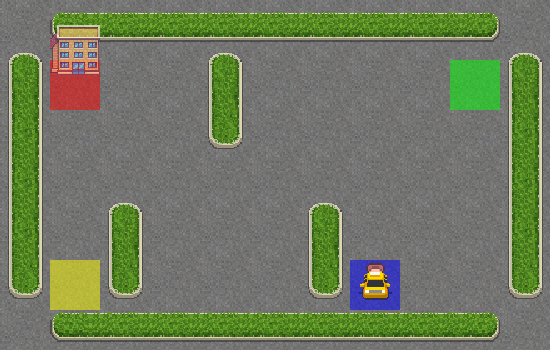

None


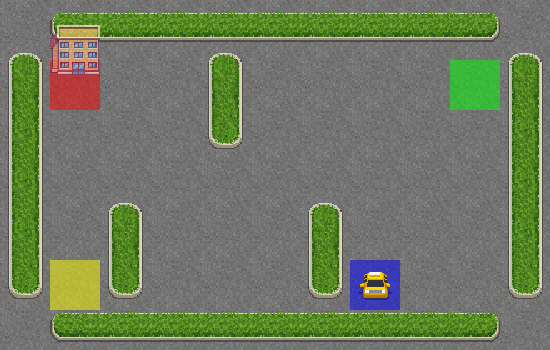

None


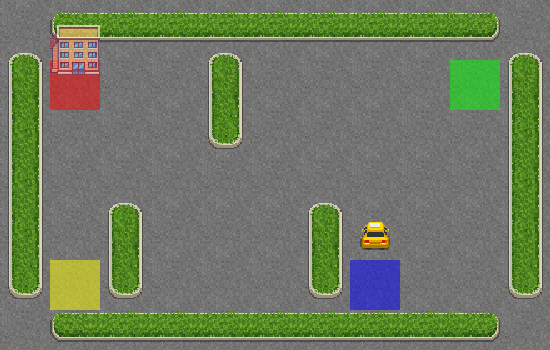

None


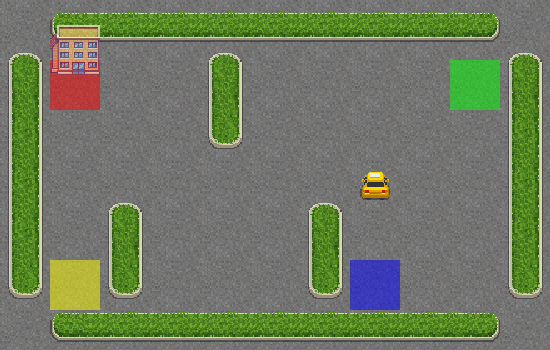

None


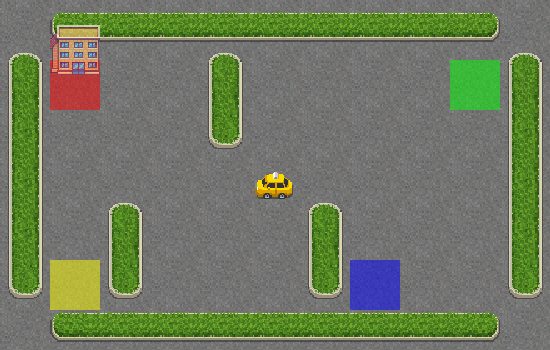

None


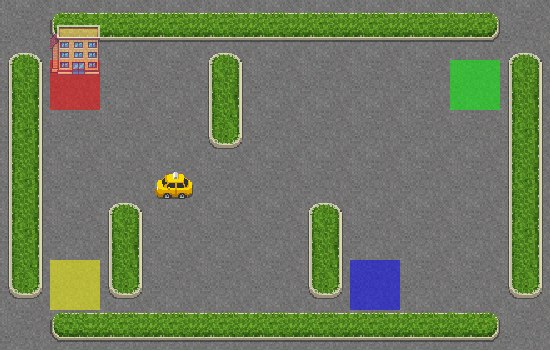

None


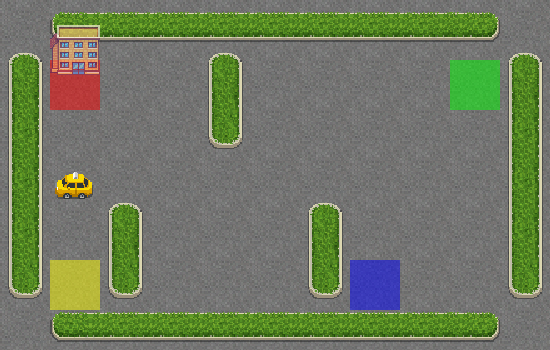

None


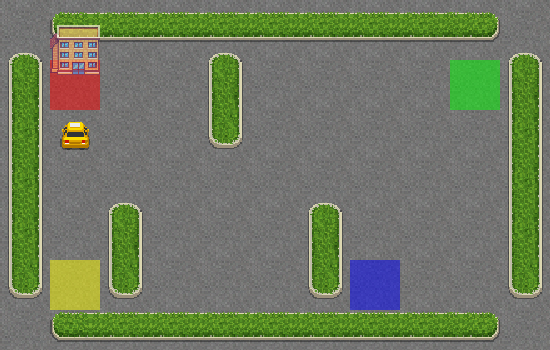

None


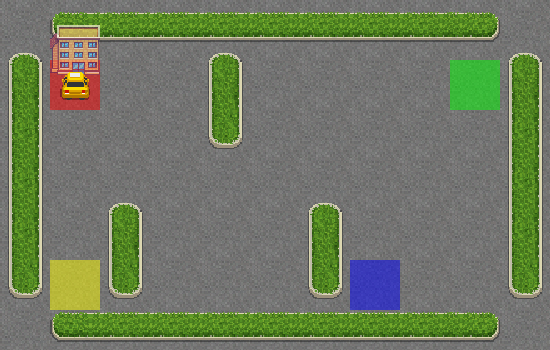

None


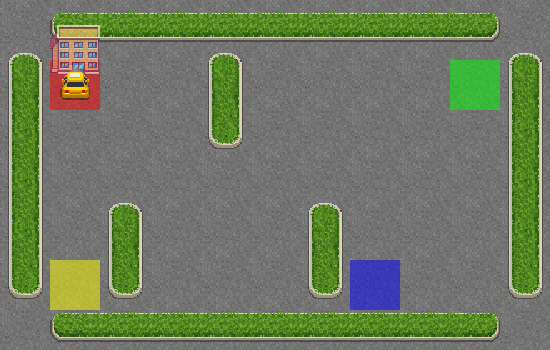

None
6


In [ ]:
#sample run after training
locations = {
    0: "Red",
    1: "Green",
    2: "Yellow",
    3: "Blue",
    4: "In taxi"
}
state,_ = env.reset()
print(f"Passenger location: {locations[list(env.unwrapped.decode(state))[2]]}, Passenger Destination: {locations[list(env.unwrapped.decode(state))[3]]}")
terminated = False
net_reward = 0
overload = 0
while terminated != True:
  action = target[state]
  state, reward, terminated, _, _ = env.step(action)
  net_reward+=reward
  print(cv2_imshow(cv2.cvtColor(env.render(),cv2.COLOR_BGR2RGB)))
  overload+=1
  if overload >= 400:
    print("Autonomous Taxi Failed")
    break
env.close()
print(net_reward)

In [ ]:
# target policy with index numbers corresponding to the state number as defined in the Open AI Gym Taxi Environment
policy = list(dict(sorted(target.items(), key=lambda i: i[0])).values())
np.array(policy)

array([4, 4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 3, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0,
       3, 4, 4, 4, 0, 3, 3, 0, 0, 3, 0, 5, 3, 0, 1, 1, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 3, 0, 0, 1,
       2, 2, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3, 1, 1, 1, 3, 3, 3, 0,
       3, 0, 0, 1, 3, 3, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2,
       3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 1, 1, 2, 3, 3, 3, 0, 0, 0,
       3, 1, 3, 0, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,